In [1]:
import numpy as np
import pandas as pd

path = '/data/examples/may_the_4_be_with_u/where_am_i/'
#path = 'D:\\AI\\where_am_i\\'

# make a label map
df = pd.read_csv(path + 'mapping.txt', header=None)
yMap = dict(zip(df[0], df[1]))
print(len(yMap), yMap)

isTransferLearning = True

resize = (224, 224)

15 {'CALsuburb': 9, 'PARoffice': 7, 'bedroom': 12, 'coast': 10, 'forest': 4, 'highway': 14, 'industrial': 2, 'insidecity': 3, 'kitchen': 0, 'livingroom': 5, 'mountain': 8, 'opencountry': 6, 'store': 11, 'street': 1, 'tallbuilding': 13}


In [2]:
import os

# show file structure
for dirname, dirnames, filenames in os.walk(path+'train'):    
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

/data/examples/may_the_4_be_with_u/where_am_i/train/CALsuburb/image_0001.jpg
/data/examples/may_the_4_be_with_u/where_am_i/train/PARoffice/image_0001.jpg
/data/examples/may_the_4_be_with_u/where_am_i/train/bedroom/image_0001.jpg
/data/examples/may_the_4_be_with_u/where_am_i/train/coast/image_0001.jpg
/data/examples/may_the_4_be_with_u/where_am_i/train/forest/image_0001.jpg
/data/examples/may_the_4_be_with_u/where_am_i/train/highway/image_0001.jpg
/data/examples/may_the_4_be_with_u/where_am_i/train/industrial/image_0001.jpg
/data/examples/may_the_4_be_with_u/where_am_i/train/insidecity/image_0001.jpg
/data/examples/may_the_4_be_with_u/where_am_i/train/kitchen/image_0001.jpg
/data/examples/may_the_4_be_with_u/where_am_i/train/livingroom/image_0001.jpg
/data/examples/may_the_4_be_with_u/where_am_i/train/mountain/image_0001.jpg
/data/examples/may_the_4_be_with_u/where_am_i/train/opencountry/image_0001.jpg
/data/examples/may_the_4_be_with_u/where_am_i/train/store/image_0001.jpg
/data/exampl

In [3]:
import os
import pandas as pd

#make a image table
trainList = []
for dirname, dirnames, filenames in os.walk(path+'train'):    
    for filename in filenames:
        folderName = os.path.split(dirname)[-1]
        #print(os.path.join(dirname, filename), folderName)        
        row = []
        row.append(yMap[folderName])
        row.append(folderName)
        row.append(filename)
        row.append(os.path.join(dirname, filename))
        trainList.append(row)        
        
trainDf = pd.DataFrame(trainList, columns=['label','folder','file','path'])          
print(trainDf.shape)

(2985, 4)


In [4]:
trainDf.head()

,label,folder,file,path
0,9,CALsuburb,image_0001.jpg,/data/examples/may_the_4_be_with_u/where_am_i/...
1,9,CALsuburb,image_0002.jpg,/data/examples/may_the_4_be_with_u/where_am_i/...
2,9,CALsuburb,image_0003.jpg,/data/examples/may_the_4_be_with_u/where_am_i/...
3,9,CALsuburb,image_0004.jpg,/data/examples/may_the_4_be_with_u/where_am_i/...
4,9,CALsuburb,image_0005.jpg,/data/examples/may_the_4_be_with_u/where_am_i/...


img.shape (224, 224, 3)
color: [ 48.  48.  48.]


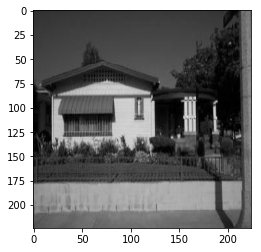

In [5]:
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

img = cv2.resize(cv2.imread(trainDf['path'][0]), resize)
plt.imshow(img) #, cmap='gray'
img = img.astype(np.float32)
print('img.shape',img.shape)
print('color:',img[0][0])


In [6]:
def getXData(dataFrame):
    X = np.array([cv2.resize(cv2.imread(file), resize).astype(np.float32) for file in dataFrame['path']])
    print(X[0][0][0])
    if isTransferLearning:
        X[:,:,:,0] = (X[:,:,:,0] - 103.94) * 0.017
        X[:,:,:,1] = (X[:,:,:,1] - 116.78) * 0.017
        X[:,:,:,2] = (X[:,:,:,2] - 123.68) * 0.017
    else:
        X /= 255.
    
    print(X[0][0][0])
    return X

In [7]:
import cv2
import numpy as np
from numpy import zeros, newaxis


#圖片變數值資料
X = getXData(trainDf)




[ 48.  48.  48.]
[-0.95098007 -1.16926003 -1.28656006]


In [8]:
#one hot encoding Y
import keras

num_classes = 15
label = keras.utils.to_categorical(trainDf['label'], num_classes)

print(label.shape)

Using TensorFlow backend.


(2985, 15)


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, label, test_size=0.2) #default就會shuffle, 不用random_state=42

print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)
print(x_train[0][0][0])
print(y_train[0:5])
print(x_train[0].shape)

(2388, 224, 224, 3) (2388, 15) (597, 224, 224, 3) (597, 15)
[ 0.73202002  0.51374006  0.39644003]
[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]
(224, 224, 3)


<h2>start training!<h2>
model參考 https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py

In [10]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import os

if isTransferLearning:
    base_model = keras.applications.densenet.DenseNet201(weights='imagenet', include_top=False, input_shape=x_train[0].shape)
    #base_model = keras.applications.densenet.DenseNet121(include_top=False, weights='imagenet', input_shape=x_train[0].shape)
    #base_model = keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=x_train[0].shape)

    # add a global spatial average pooling layer
    x = base_model.output
    #x = GlobalAveragePooling2D()(x)
    x = GlobalAveragePooling2D(data_format='channels_last')(x)
    x = Dropout(0.5)(x)

    # let's add a fully-connected layer
    #x = Dense(1024, activation='relu')(x)
    # and a logistic layer 
    predictions = Dense(num_classes, activation='softmax')(x)

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)

    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolutional InceptionV3 layers
    #for layer in base_model.layers:
        #layer.trainable = False   
        
    print(model.layers[0])
    print(model.layers[-1])
    for layer in model.layers[-16:]:  
        layer.trainable = False    
else:    
    # build our CNN model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=x_train[0].shape))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

print(model.summary())


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [11]:
print(model.layers[-16:])

[<keras.layers.convolutional.Conv2D object at 0x7f061e6f7828>, <keras.layers.normalization.BatchNormalization object at 0x7f061e68bef0>, <keras.layers.core.Activation object at 0x7f061e612d30>, <keras.layers.convolutional.Conv2D object at 0x7f061e5ffc50>, <keras.layers.merge.Concatenate object at 0x7f061e5cee48>, <keras.layers.normalization.BatchNormalization object at 0x7f061e5274a8>, <keras.layers.core.Activation object at 0x7f061e4c2ac8>, <keras.layers.convolutional.Conv2D object at 0x7f061e4a8e80>, <keras.layers.normalization.BatchNormalization object at 0x7f061e4dbf60>, <keras.layers.core.Activation object at 0x7f061e4174a8>, <keras.layers.convolutional.Conv2D object at 0x7f061e3d2048>, <keras.layers.merge.Concatenate object at 0x7f061e3889e8>, <keras.layers.normalization.BatchNormalization object at 0x7f061e307668>, <keras.layers.pooling.GlobalAveragePooling2D object at 0x7f061e293518>, <keras.layers.core.Dropout object at 0x7f061e2131d0>, <keras.layers.core.Dense object at 0x7f0

In [12]:

# initiate Adam optimizer
opt = keras.optimizers.Adam()
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
#opt = keras.optimizers.SGD(lr=1e-2, decay=1e-6, momentum=0.9, nesterov=True)

# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



In [13]:
# Use ModelCheckpoint to save model and weights
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_trained_model.h5'
print(save_dir)

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)

try:    
    #modelBest = load_model(model_path)
    if modelBest is not None:
        print('modelBest',modelBest)
        #scores = modelBest.evaluate(x_test, y_test, verbose=1)
        print('modelBest loss:', scores[0])
        print('modelBest accuracy:', scores[1])   
except Exception as error:
    print('Caught this error: ' + repr(error))
    
    

/home/jovyan/murphy/where_am_i/saved_models
Caught this error: NameError("name 'modelBest' is not defined",)


In [14]:
batch_size = 32
epochs = 80

print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)


checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=0)

# earlystop
earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose=0)

# Fit the model on the batches generated by datagen.flow().

isSaveModel = True
modelBest = None
if isSaveModel:
    model_history = model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4,
                    callbacks=[earlystop, checkpoint])
    
    # loading our save model
    print("Loading trained model ", model_path)
    modelBest = load_model(model_path)

else:
    model_history = model.fit_generator(datagen.flow(x_train, y_train,
                         batch_size=batch_size),
            epochs=epochs,
            validation_data=(x_test, y_test),
            workers=1)


# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


if modelBest is not None:
    print('modelBest',modelBest)
    scores = modelBest.evaluate(x_test, y_test, verbose=1)
    print('modelBest loss:', scores[0])
    print('modelBest accuracy:', scores[1])
    model = modelBest


(2388, 224, 224, 3) (2388, 15) (597, 224, 224, 3) (597, 15)
Using real-time data augmentation.
Epoch 1/80
74/75 [============================>.] - ETA: 0s - loss: 1.1729 - acc: 0.6385
Epoch 00001: val_loss improved from inf to 9.89186, saving model to /home/jovyan/murphy/where_am_i/saved_models/keras_trained_model.h5
75/75 [==============================] - 168s 2s/step - loss: 1.1779 - acc: 0.6379 - val_loss: 9.8919 - val_acc: 0.2898
Epoch 2/80
74/75 [============================>.] - ETA: 0s - loss: 0.7562 - acc: 0.7592
Epoch 00002: val_loss improved from 9.89186 to 6.58103, saving model to /home/jovyan/murphy/where_am_i/saved_models/keras_trained_model.h5
75/75 [==============================] - 40s 539ms/step - loss: 0.7566 - acc: 0.7583 - val_loss: 6.5810 - val_acc: 0.4271
Epoch 3/80
74/75 [============================>.] - ETA: 0s - loss: 0.5844 - acc: 0.8068
Epoch 00003: val_loss improved from 6.58103 to 4.74999, saving model to /home/jovyan/murphy/where_am_i/saved_models/keras_

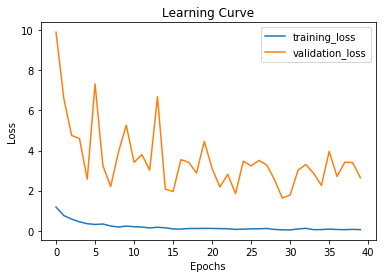

In [15]:
training_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

In [16]:
import os
import pandas as pd

testList = []
for dirname, dirnames, filenames in os.walk(path+'testset'):    
    for filename in filenames:
        row = []
        row.append(filename.replace('.jpg',''))
        row.append(os.path.join(dirname, filename))
        testList.append(row)
        
testDf = pd.DataFrame(testList, columns=['id','path'])        
  
print(testDf.shape, testDf.iloc[0,0], testDf.iloc[0,1])

(1500, 2) 001d4c8d70ebf7f025fccf256324d3d5ad3560faee1cdf8c7115f5eb033bc3d2 /data/examples/may_the_4_be_with_u/where_am_i/testset/001d4c8d70ebf7f025fccf256324d3d5ad3560faee1cdf8c7115f5eb033bc3d2.jpg


In [17]:
testDf.head()

,id,path
0,001d4c8d70ebf7f025fccf256324d3d5ad3560faee1cdf...,/data/examples/may_the_4_be_with_u/where_am_i/...
1,00317b9d4bed4a2b1017e2bd31b9bf2f25bad05a65f570...,/data/examples/may_the_4_be_with_u/where_am_i/...
2,003d15d71c1514af5bb8734a96bae2c4d1ce299da8d369...,/data/examples/may_the_4_be_with_u/where_am_i/...
3,013c78d920be5390dbc66ca238ae3f49a2b0cf13e36013...,/data/examples/may_the_4_be_with_u/where_am_i/...
4,0175d5cda7ae5f6767187eef4bc29e0be62a5506acfdcf...,/data/examples/may_the_4_be_with_u/where_am_i/...


In [18]:

imgTest = getXData(testDf)    

if isTransferLearning:
    y_test_pred_prob = model.predict(imgTest)
    y_pred = y_test_pred_prob.argmax(axis=-1)
else:
    y_pred=model.predict_classes(imgTest)


print(y_pred.shape)

[ 253.  253.  253.]
[ 2.53402019  2.31574011  2.19844031]
(1500,)


In [19]:
out = pd.DataFrame()
out['id'] = testDf['id']
out['class'] = y_pred
print(out.shape)
out.to_csv('submit.csv',index=False)

(1500, 2)
